<a href="https://colab.research.google.com/github/Masakinka/python_for_ds_task/blob/main/HW_2_9_%D0%9D%D0%B5%D0%B7%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D0%B0%D0%BD%D0%B0_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D0%BE%D0%B2%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D0%B8%D1%84%D1%96%D0%BA%D0%B0%D1%86%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому ДЗ ми потренуємось розв'язувати задачу багатокласової класифікації за допомогою логістичної регресії з використанням стратегій One-vs-Rest та One-vs-One, оцінити якість моделей та порівняти стратегії.

### Опис задачі і даних

**Контекст**

В цьому ДЗ ми працюємо з даними про сегментацію клієнтів.

Сегментація клієнтів – це практика поділу бази клієнтів на групи індивідів, які схожі між собою за певними критеріями, що мають значення для маркетингу, такими як вік, стать, інтереси та звички у витратах.

Компанії, які використовують сегментацію клієнтів, виходять з того, що кожен клієнт є унікальним і що їхні маркетингові зусилля будуть більш ефективними, якщо вони орієнтуватимуться на конкретні, менші групи зі зверненнями, які ці споживачі вважатимуть доречними та які спонукатимуть їх до купівлі. Компанії також сподіваються отримати глибше розуміння уподобань та потреб своїх клієнтів з метою виявлення того, що кожен сегмент цінує найбільше, щоб точніше адаптувати маркетингові матеріали до цього сегменту.

**Зміст**.

Автомобільна компанія планує вийти на нові ринки зі своїми існуючими продуктами (P1, P2, P3, P4 і P5). Після інтенсивного маркетингового дослідження вони дійшли висновку, що поведінка нового ринку схожа на їхній існуючий ринок.

На своєму існуючому ринку команда з продажу класифікувала всіх клієнтів на 4 сегменти (A, B, C, D). Потім вони здійснювали сегментовані звернення та комунікацію з різними сегментами клієнтів. Ця стратегія працювала для них надзвичайно добре. Вони планують використати ту саму стратегію на нових ринках і визначили 2627 нових потенційних клієнтів.

Ви маєте допомогти менеджеру передбачити правильну групу для нових клієнтів.

В цьому ДЗ використовуємо дані `customer_segmentation_train.csv`[скачати дані](https://drive.google.com/file/d/1VU1y2EwaHkVfr5RZ1U4MPWjeflAusK3w/view?usp=sharing). Це `train.csv`з цього [змагання](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation/data?select=train.csv)

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, precision_score, recall_score
from scipy.stats import chi2_contingency

#import warnings

In [92]:
pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

**Завдання 1.** Завантажте та підготуйте датасет до аналізу. Виконайте обробку пропущених значень та необхідне кодування категоріальних ознак. Розбийте на тренувальну і тестувальну вибірку, де в тесті 20%. Памʼятаємо, що весь препроцесинг ліпше все ж тренувати на тренувальній вибірці і на тестувальній лише використовувати вже натреновані трансформери.
Але в даному випадку оскільки значень в категоріях небагато, можна зробити обробку і на оригінальних даних, а потім розбити - це простіше. Можна також реалізувати процесинг і тренування моделі з пайплайнами. Обирайте як вам зручніше.

In [93]:
customer_segmentation_df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/customer_segmentation_train.csv")

In [94]:
customer_segmentation_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.00,Cat_6,A


In [95]:
customer_segmentation_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [96]:
customer_segmentation_df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.00,8068.00,7239.00,7733.00
mean,463479.21,43.47,2.64,2.85
std,2595.38,16.71,3.41,1.53
min,458982.00,18.00,0.00,1.00
25%,461240.75,30.00,0.00,2.00
50%,463472.50,40.00,1.00,3.00
75%,465744.25,53.00,4.00,4.00
max,467974.00,89.00,14.00,9.00


In [97]:
customer_segmentation_df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [98]:
# Відображення типів даних всіх колонок
data_types = customer_segmentation_df.dtypes

# Визначення унікальних значень і їх кількість для кожної категоріальної колонки
categorical_columns = customer_segmentation_df.select_dtypes(include=['object']).columns
unique_values = {col: customer_segmentation_df[col].unique() for col in categorical_columns}
nunique_values = {col: customer_segmentation_df[col].nunique() for col in categorical_columns}

# Створення зведеної DataFrame
summary_unique_values = {
    "Column": categorical_columns,
    "Unique Values": [unique_values[col] for col in categorical_columns],
    "Number of Unique Values": [nunique_values[col] for col in categorical_columns]
}

unique_values_df = pd.DataFrame(summary_unique_values)

# Відображення типів даних
print("Column Data Types:")
print(data_types)

# Відображення  зведених даних DataFrame
print("\nUnique Values in Categorical Columns:")
print(unique_values_df)

Column Data Types:
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

Unique Values in Categorical Columns:
           Column                                      Unique Values  Number of Unique Values
0          Gender                                     [Male, Female]                        2
1    Ever_Married                                     [No, Yes, nan]                        2
2       Graduated                                     [No, Yes, nan]                        2
3      Profession  [Healthcare, Engineer, Lawyer, Entertainment, ...                        9
4  Spending_Score                               [Low, Average, High]                        3
5           Var_1  [Cat_4, Cat_6, Cat_7, Cat_3, Cat_1, Cat_2, nan..

У нашому датасеті пропущені значення наявні в таких колонках: Ever_Married, Graduated, Profession, Work_Experience, Family_Size, Var_1.

- для числових ознак (Work_Experience, Family_Size) використаємо медіану для заповнення пропущених значень. Медіана є стійкою до викидів і добре підходить для ознак, де розподіл може бути асиметричним.
-для  категоріальні ознаки (Ever_Married, Graduated, Var_1)використаємо найчастіше значення (mode) для заповнення пропущених значень. Це дозволить зберегти існуючий розподіл категорій.
- для колонки Profession заповнення пропущених значень буде 'Unknown'. Це робиться для того, щоб зберегти інформацію про те, що певні значення були пропущені, і можливо, ця інформація буде корисною для моделі.

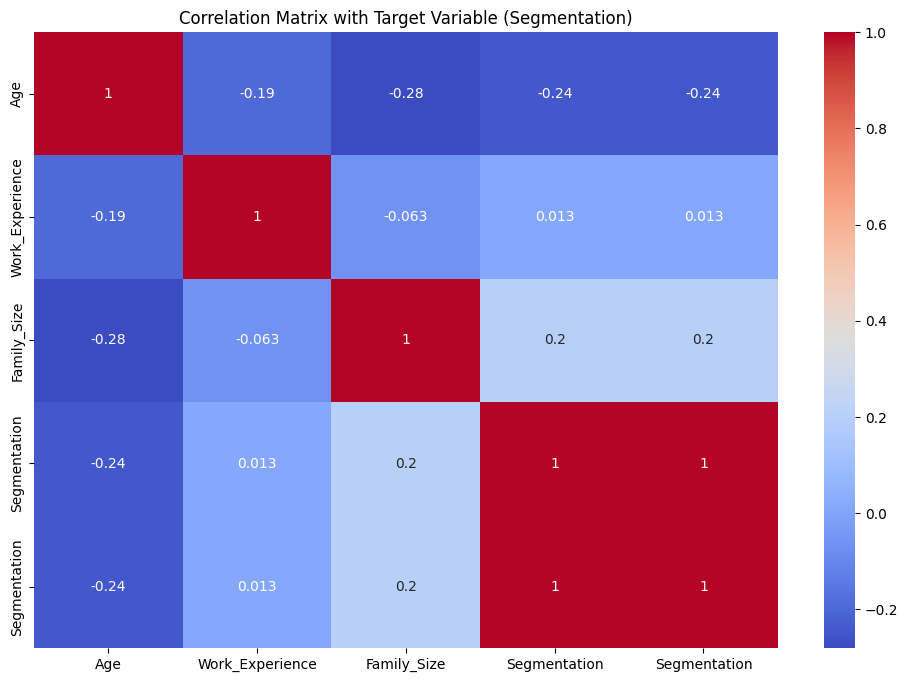

Feature: Gender, p-value: 0.009618143763412594
Feature: Ever_Married, p-value: 1.7634922738184225e-305
Feature: Graduated, p-value: 4.384656787114855e-231
Feature: Profession, p-value: 0.0
Feature: Spending_Score, p-value: 0.0
Feature: Var_1, p-value: 1.646068148998022e-41


In [102]:
# Кодування цільової змінної
label_encoder = LabelEncoder()
customer_segmentation_df['Segmentation'] = label_encoder.fit_transform(customer_segmentation_df['Segmentation'])

# Перевірка кореляції між числовими змінними та цільовою функцією
numerical_features = customer_segmentation_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('ID')  # Видаляємо 'ID' з числових ознак, бо це ідентифікатор

# Додаємо цільову змінну до числових ознак для побудови кореляційної матриці
correlation_matrix = customer_segmentation_df[numerical_features + ['Segmentation']].corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Target Variable (Segmentation)')
plt.show()

# Перевірка кореляції категоріальних змінних з цільовою функцією
categorical_features = customer_segmentation_df.select_dtypes(include=['object']).columns.tolist()

# Функція для обчислення статистичної значущості за допомогою тесту хі-квадрат
def chi_square_test(feature, target):
    contingency_table = pd.crosstab(customer_segmentation_df[feature], customer_segmentation_df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return p

# Друк результатів тесту хі-квадрат для кожної категоріальної ознаки
for feature in categorical_features:
    p_value = chi_square_test(feature, 'Segmentation')
    print(f"Feature: {feature}, p-value: {p_value}")

іж числовими ознаками та цільовою змінною Segmentation можна зробити наступні висновки:
- кореляція між Age та Segmentation є слабкою і від'ємною (-0.24), що вказує на те, що з віком сегментація має незначну тенденцію до змін, але це не є основним фактором.
- gрактично відсутня кореляція між Work_Experience та Segmentation (0.0082), що вказує на те, що цей фактор не впливає на розподіл по сегментах.
- Кореляція між Family_Size та Segmentation є слабкою і додатною (0.19), що вказує на певний, але незначний вплив розміру родини на сегментацію.

Для категоріальних ознак:
- p-value = 0.0096, що вказує на статистично значущий зв'язок між Gender та сегментацією.
- p-value = 1.88e-296, що вказує на дуже сильний статистично значущий зв'язок між Ever_Married та сегментацією.
- p-value = 1.46e-229, що вказує на дуже сильний статистично значущий зв'язок між Graduated та сегментацією.
- p-value = 0.0, що вказує на дуже сильний статистично значущий зв'язок між Profession та сегментацією.
- p-value = 0.0, що вказує на дуже сильний статистично значущий зв'язок між оцінкою Spending_Score та сегментацією.
- p-value = 2.47e-41, що вказує на дуже сильний статистично значущий зв'язок між цією Var_1 та сегментацією.

1. Оскільки всі категоріальні ознаки мають статистично значущий зв'язок з цільовою змінною, їх обов'язково потрібно включити в модель.
2. Незважаючи на слабкий зв'язок числових ознак з цільовою змінною, варто їх залишити в моделі для потенційного покращення точності. Можливо, їх вплив стане помітним у комбінації з іншими ознаками.

In [116]:
# Заповнення пропущених значень у колонці 'Profession' значенням 'Unknown'
customer_segmentation_df['Profession'].fillna('Unknown', inplace=True)

# Обробка пропущених значень та кодування
numeric_features = ['Age', 'Work_Experience', 'Family_Size']
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

# Пайплайн для числових ознак
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Пайплайн для категоріальних ознак
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Об'єднання числового та категоріального пайплайнів
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Визначення ознак (X) та цільової змінної (y)
X = customer_segmentation_df.drop('Segmentation', axis=1)
y = customer_segmentation_df['Segmentation']

# Розбиття на тренувальну і тестувальну вибірку зі стратифікацією
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Логістична регресія
log_reg = LogisticRegression(solver='liblinear')

# Пайплайн для OvR моделі
ovr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', OneVsRestClassifier(log_reg))])

# Пайплайн для OvO моделі
ovo_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', OneVsOneClassifier(log_reg))])

# Тренування пайплайнів на тренувальній вибірці
ovr_pipeline.fit(X_train, y_train)
ovo_pipeline.fit(X_train, y_train)

# Прогнозування на тестових даних
ovr_predictions = ovr_pipeline.predict(X_test)
ovo_predictions = ovo_pipeline.predict(X_test)

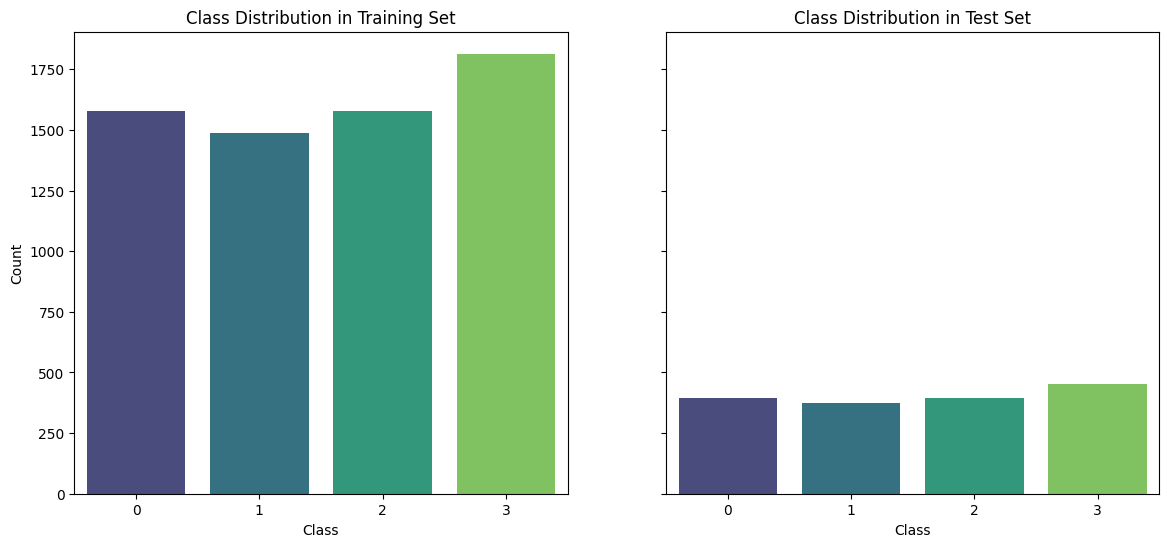

In [104]:
# Візуалізація розподілу класів цільової змінної в тренувальній і тестовій вибірках
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(ax=axes[0], x=y_train, palette='viridis', order=sorted(y_train.unique()))
axes[0].set_title('Class Distribution in Training Set')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

sns.countplot(ax=axes[1], x=y_test, palette='viridis', order=sorted(y_test.unique()))
axes[1].set_title('Class Distribution in Test Set')
axes[1].set_xlabel('Class')

plt.show()

In [121]:
# Усереднені метрики macro та micro для OvR
ovr_macro_precision = precision_score(y_test, ovr_predictions, average='macro')
ovr_micro_precision = precision_score(y_test, ovr_predictions, average='micro')
ovr_macro_recall = recall_score(y_test, ovr_predictions, average='macro')
ovr_micro_recall = recall_score(y_test, ovr_predictions, average='micro')

# Усереднені метрики macro та micro для OvO
ovo_macro_precision = precision_score(y_test, ovo_predictions, average='macro')
ovo_micro_precision = precision_score(y_test, ovo_predictions, average='micro')
ovo_macro_recall = recall_score(y_test, ovo_predictions, average='macro')
ovo_micro_recall = recall_score(y_test, ovo_predictions, average='micro')

# Створимо датафрейм для відображення результатів
results = pd.DataFrame({
    'Metric': ['Macro Precision', 'Micro Precision', 'Macro Recall', 'Micro Recall'],
    'OvR': [ovr_macro_precision, ovr_micro_precision, ovr_macro_recall, ovr_micro_recall],
    'OvO': [ovo_macro_precision, ovo_micro_precision, ovo_macro_recall, ovo_micro_recall]
})
print(results)

# Друк classification_report для обох моделей
print("Classification Report for OvR:")
print(classification_report(y_test, ovr_predictions))
print("Classification Report for OvO:")
print(classification_report(y_test, ovo_predictions))

            Metric  OvR  OvO
0  Macro Precision 0.50 0.50
1  Micro Precision 0.52 0.52
2     Macro Recall 0.50 0.51
3     Micro Recall 0.52 0.52
Classification Report for OvR:
              precision    recall  f1-score   support

           0       0.43      0.46      0.44       394
           1       0.42      0.17      0.25       372
           2       0.49      0.62      0.54       394
           3       0.65      0.76      0.70       454

    accuracy                           0.52      1614
   macro avg       0.50      0.50      0.48      1614
weighted avg       0.50      0.52      0.49      1614

Classification Report for OvO:
              precision    recall  f1-score   support

           0       0.42      0.41      0.42       394
           1       0.41      0.28      0.33       372
           2       0.51      0.58      0.54       394
           3       0.64      0.75      0.69       454

    accuracy                           0.52      1614
   macro avg       0.50      0.5

1. Обидві моделі досягають однакової точності 52%.
2. Значення макро точності (Precision) та макро повноти (Recall) також є однаковими (50%) для обох стратегій, з незначною перевагою OvO в макро повноті (51%).
3. Зважені середні значення показують, що стратегія OvO трохи краща за F1-Score (0.51 проти 0.49 для OvR).
4. У звітах за класами видно, що клас 3 має найвищу точність і повноту у обох моделей, що може свідчити про добре розпізнавання цього класу моделями.

Хоча обидві стратегії мають схожі результати, OvO стратегія показує дещо кращі результати в макро повноті (Recall) та зваженому F1-Score. Однак, варто зауважити, що обидві моделі мають значний простір для покращення, особливо в класі 1, де повнота (Recall) є найнижчою.

Що можно ще зробити:
- використати інших алгоритмів машинного навчання.
- виконати більш детальну обробку даних.
- застосувати методи підбору гіперпараметрів.
- розширення набору даних або створення нових ознак.

Спробуємо трохи покращіти результати виконавши більш детальну обробку, прибравши аутлаери з даних.

In [126]:
# Видалення викидів
for feature in numeric_features:
    Q1 = customer_segmentation_df[feature].quantile(0.25)
    Q3 = customer_segmentation_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    filter = (customer_segmentation_df[feature] >= Q1 - 1.5 * IQR) & (customer_segmentation_df[feature] <= Q3 + 1.5 * IQR)
    customer_segmentation_df = customer_segmentation_df.loc[filter]

In [127]:
ovr_macro_precision = precision_score(y_test, ovr_predictions, average='macro')
ovr_micro_precision = precision_score(y_test, ovr_predictions, average='micro')
ovr_macro_recall = recall_score(y_test, ovr_predictions, average='macro')
ovr_micro_recall = recall_score(y_test, ovr_predictions, average='micro')

# Усереднені метрики macro та micro для OvO
ovo_macro_precision = precision_score(y_test, ovo_predictions, average='macro')
ovo_micro_precision = precision_score(y_test, ovo_predictions, average='micro')
ovo_macro_recall = recall_score(y_test, ovo_predictions, average='macro')
ovo_micro_recall = recall_score(y_test, ovo_predictions, average='micro')

# Створимо датафрейм для відображення результатів
results = pd.DataFrame({
    'Metric': ['Macro Precision', 'Micro Precision', 'Macro Recall', 'Micro Recall'],
    'OvR': [ovr_macro_precision, ovr_micro_precision, ovr_macro_recall, ovr_micro_recall],
    'OvO': [ovo_macro_precision, ovo_micro_precision, ovo_macro_recall, ovo_micro_recall]
})
print(results)

# Друк classification_report для обох моделей
print("Classification Report for OvR:")
print(classification_report(y_test, ovr_predictions))
print("Classification Report for OvO:")
print(classification_report(y_test, ovo_predictions))

            Metric  OvR  OvO
0  Macro Precision 0.53 0.53
1  Micro Precision 0.55 0.55
2     Macro Recall 0.54 0.54
3     Micro Recall 0.55 0.55
Classification Report for OvR:
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       317
           1       0.43      0.18      0.26       315
           2       0.53      0.71      0.61       342
           3       0.68      0.73      0.71       352

    accuracy                           0.55      1326
   macro avg       0.53      0.54      0.52      1326
weighted avg       0.53      0.55      0.52      1326

Classification Report for OvO:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       317
           1       0.43      0.26      0.33       315
           2       0.54      0.66      0.59       342
           3       0.67      0.74      0.70       352

    accuracy                           0.55      1326
   macro avg       0.53      0.5

1. Точність моделей OvR та OvO збільшилася з 0.52 до 0.55 після детальної обробки даних.

2. OvR:
Macro Precision збільшився з 0.50 до 0.53.
Micro Precision збільшився з 0.52 до 0.55.
Macro Recall збільшився з 0.50 до 0.54.
Micro Recall збільшився з 0.52 до 0.55.
3. OvO:
Macro Precision збільшився з 0.50 до 0.53.
Micro Precision збільшився з 0.52 до 0.55.
Macro Recall збільшився з 0.51 до 0.54.
Micro Recall збільшився з 0.52 до 0.55.

4. Після прибирання аутлаерів метрики Precision, Recall та F1-Score покращилися для кожного класу.
Значне покращення помітно для класу 1, де значення Recall суттєво збільшилось.
Загальний висновок
Після прибирання аутлаерів моделі показали значне покращення в усіх основних метриках, включаючи accurancy, Precision та Recall. Це свідчить про те, що додаткова обробка даних позитивно вплинула на якість моделей.

**Завдання 2. Важливо уважно прочитати все формулювання цього завдання до кінця!**

Застосуйте методи ресемплингу даних SMOTE та SMOTE-Tomek з бібліотеки imbalanced-learn до тренувальної вибірки. В результаті у Вас має вийти 2 тренувальних набори: з апсемплингом зі SMOTE, та з ресамплингом з SMOTE-Tomek.

Увага! В нашому наборі даних є як категоріальні дані, так і звичайні числові. Базовий SMOTE не буде правильно працювати з категоріальними даними, але є його модифікація, яка буде. Тому в цього завдання є 2 виконання

  1. Застосувати SMOTE базовий лише на НЕкатегоріальних ознаках і порівняти лін регресію на апсампл даних без категоріальних ознак.

  2. Переглянути інформацію про метод [SMOTENC](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) і використати цей метод в цій задачі. За цей спосіб буде +3 бали за це завдання і він рекомендований для виконання.

  **Підказка**: аби скористатись SMOTENC треба створити змінну, яка містить індекси ознак, які є категоріальними (їх номер серед колонок) і передати при ініціації екземпляра класу `SMOTENC(..., categorical_features=cat_feature_indeces)`.
  
  Ви також можете розглянути варіант використання варіації SMOTE, який працює ЛИШЕ з категоріальними ознаками [SMOTEN](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html)

In [136]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek

In [135]:
# Створення пайплайну для ресемплінгу та моделі
pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', log_reg)])

# Тренування та оцінка моделі на даних зі SMOTE
pipeline_smote.fit(X_train, y_train)
y_pred_smote = pipeline_smote.predict(X_test)

# Оцінка моделі
print("SMOTE Logistic Regression")
print(classification_report(y_test, y_pred_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_smote))

SMOTE Logistic Regression
              precision    recall  f1-score   support

           0       0.44      0.54      0.48       317
           1       0.45      0.23      0.30       315
           2       0.54      0.67      0.60       342
           3       0.70      0.71      0.71       352

    accuracy                           0.54      1326
   macro avg       0.53      0.54      0.52      1326
weighted avg       0.54      0.54      0.53      1326

Accuracy: 0.5444947209653092


In [137]:
# Індекси категоріальних ознак
cat_feature_indices = [X_train.columns.get_loc(col) for col in categorical_features]

# Створення пайплайну для моделі Logistic Regression з використанням SMOTENC
pipeline_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=cat_feature_indices, random_state=42)),
    ('classifier', log_reg)])

# Тренування та оцінка моделі на даних зі SMOTENC
pipeline_smotenc.fit(X_train, y_train)
y_pred_smotenc = pipeline_smotenc.predict(X_test)

# Оцінка моделі
print("SMOTENC Logistic Regression")
print(classification_report(y_test, y_pred_smotenc))
print("Accuracy:", accuracy_score(y_test, y_pred_smotenc))

SMOTENC Logistic Regression
              precision    recall  f1-score   support

           0       0.45      0.54      0.49       317
           1       0.44      0.22      0.29       315
           2       0.54      0.67      0.60       342
           3       0.70      0.72      0.71       352

    accuracy                           0.54      1326
   macro avg       0.53      0.54      0.52      1326
weighted avg       0.54      0.54      0.53      1326

Accuracy: 0.5444947209653092


In [138]:
# Створення пайплайну для моделі Logistic Regression з використанням SMOTE-Tomek
pipeline_smotetomek = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotetomek', SMOTETomek(smote=SMOTENC(categorical_features=cat_feature_indices, random_state=42), random_state=42)),
    ('classifier', log_reg)])

# Тренування та оцінка моделі на даних зі SMOTE-Tomek
pipeline_smotetomek.fit(X_train, y_train)
y_pred_smotetomek = pipeline_smotetomek.predict(X_test)

# Оцінка моделі
print("SMOTE-Tomek Logistic Regression")
print(classification_report(y_test, y_pred_smotetomek))
print("Accuracy:", accuracy_score(y_test, y_pred_smotetomek))

SMOTE-Tomek Logistic Regression
              precision    recall  f1-score   support

           0       0.44      0.56      0.49       317
           1       0.45      0.22      0.29       315
           2       0.54      0.67      0.60       342
           3       0.70      0.70      0.70       352

    accuracy                           0.54      1326
   macro avg       0.53      0.54      0.52      1326
weighted avg       0.54      0.54      0.53      1326

Accuracy: 0.5429864253393665


1. Усі три методи мають однакову точність - 0.54.
Це свідчить про те, що всі три методи ресемплінгу забезпечують схожий рівень продуктивності.
2. У всіх методах найкраща продуктивність спостерігається для класу 3, а найгірша для класу 1.
SMOTENC та SMOTE-Tomek незначно покращують точність для класу 0.
3. Усі три методи показують схожі результати, тому вибір методу може залежати від інших факторів, таких як час виконання та складність моделі.
Якщо б ми мали справу з великими обсягами даних та числовими і категоріальними ознаками, використання SMOTENC або SMOTE-Tomek може бути більш вигідним.

**Завдання 3**.
  1. Навчіть модель логістичної регресії з використанням стратегії One-vs-Rest з логістичною регресією на оригінальних даних, збалансованих з SMOTE, збалансованих з Smote-Tomek.  
  2. Виміряйте якість кожної з натренованих моделей використовуючи `sklearn.metrics.classification_report`.
  3. Напишіть, яку метрику ви обрали для порівняння моделей.
  4. Яка модель найкраща?
  5. Якщо немає суттєвої різниці між моделями - напишіть свою гіпотезу, чому?

In [139]:
# Навчання моделі без балансування
ovr_pipeline_original = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', OneVsRestClassifier(log_reg))
])
ovr_pipeline_original.fit(X_train, y_train)
y_pred_original = ovr_pipeline_original.predict(X_test)

# Навчання моделі з SMOTE
ovr_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', OneVsRestClassifier(log_reg))
])
ovr_pipeline_smote.fit(X_train, y_train)
y_pred_smote = ovr_pipeline_smote.predict(X_test)

# Навчання моделі з SMOTE-Tomek
ovr_pipeline_smotetomek = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotetomek', SMOTETomek(random_state=42)),
    ('classifier', OneVsRestClassifier(log_reg))
])
ovr_pipeline_smotetomek.fit(X_train, y_train)
y_pred_smotetomek = ovr_pipeline_smotetomek.predict(X_test)

# Виведення результатів
print("Original Logistic Regression")
print(classification_report(y_test, y_pred_original))

print("\nSMOTE Logistic Regression")
print(classification_report(y_test, y_pred_smote))

print("\nSMOTE-Tomek Logistic Regression")
print(classification_report(y_test, y_pred_smotetomek))

Original Logistic Regression
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       317
           1       0.43      0.18      0.26       315
           2       0.53      0.71      0.61       342
           3       0.68      0.73      0.71       352

    accuracy                           0.55      1326
   macro avg       0.53      0.54      0.52      1326
weighted avg       0.53      0.55      0.52      1326


SMOTE Logistic Regression
              precision    recall  f1-score   support

           0       0.44      0.54      0.48       317
           1       0.45      0.23      0.30       315
           2       0.54      0.67      0.60       342
           3       0.70      0.71      0.71       352

    accuracy                           0.54      1326
   macro avg       0.53      0.54      0.52      1326
weighted avg       0.54      0.54      0.53      1326


SMOTE-Tomek Logistic Regression
              precision    recall  f1-sco

1. Для порівняння моделей я обираю метрику f1-score, оскільки вона є гарним балансом між precision та recall. Це особливо корисно в задачах з незбалансованими класами.
На основі f1-score, модель з найвищим значенням f1-score для кожного класу буде найкращою.

2. Порівняння моделей:
- Найкраща продуктивність по f1-score показує модель з використанням SMOTE-Tomek, а найгірша продуктивність по f1-score показує модель без балансування.
Метрика f1-score для всіх моделей демонструє незначні відмінності, що може свідчити про те, що балансування класів не суттєво покращує продуктивність логістичної регресії на даних.
- Original Logistic Regression: Трохи кращий f1-score для класів 1 і 2, але - загальна точність трохи вища.
- SMOTE Logistic Regression: Невелике покращення в precision для класу 1, але recall залишився приблизно таким же.
- SMOTE-Tomek Logistic Regression: Трохи краще recall для класу 0, але загальна продуктивність дуже схожа на інші моделі.

3. Незважаючи на використання методів балансування даних (SMOTE та SMOTE-Tomek), ми не бачимо суттєвого покращення у метриках порівняно з оригінальною моделлю. Це може бути пов'язано з тим, що класова структура в даних не сильно залежить від частоти зразків у кожному класі, або що модель логістичної регресії достатньо добре працює з оригінальними даними без додаткового ресемплінгу. Інша можлива причина - недостатня складність моделі для захоплення складних патернів у даних.







